In [1]:
#Once u save the .csv file in this directory, run to import it.
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

#warnings.filterwarnings("ignore")

#Run before importing KMeans

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
#To read the .csv dataset...
#Importing the dataset
BDdata = pd.read_csv('buddymove_holidayiq.csv')

In [3]:
#To have a better understanding of the dataset, use head, describe and info to explore it.
BDdata.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [4]:
BDdata = BDdata.drop(['User Id'], axis=1)
BDdata

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86
...,...,...,...,...,...,...
244,18,139,148,129,129,168
245,22,114,228,104,84,168
246,20,124,178,104,158,174
247,20,133,149,139,144,213


In [5]:
#!pip install sweetviz

In [6]:
#import sweetviz as sv

In [7]:
#from sweetviz.eda import create_report
#my_report= sv.analyze(BDdata)
#my_report.show_html()

In [8]:
print('Display of DataInfo')
BDdata.info()

Display of DataInfo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sports     249 non-null    int64
 1   Religious  249 non-null    int64
 2   Nature     249 non-null    int64
 3   Theatre    249 non-null    int64
 4   Shopping   249 non-null    int64
 5   Picnic     249 non-null    int64
dtypes: int64(6)
memory usage: 11.8 KB


In [9]:
BDdata.shape

(249, 6)

In [10]:
BDdata.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


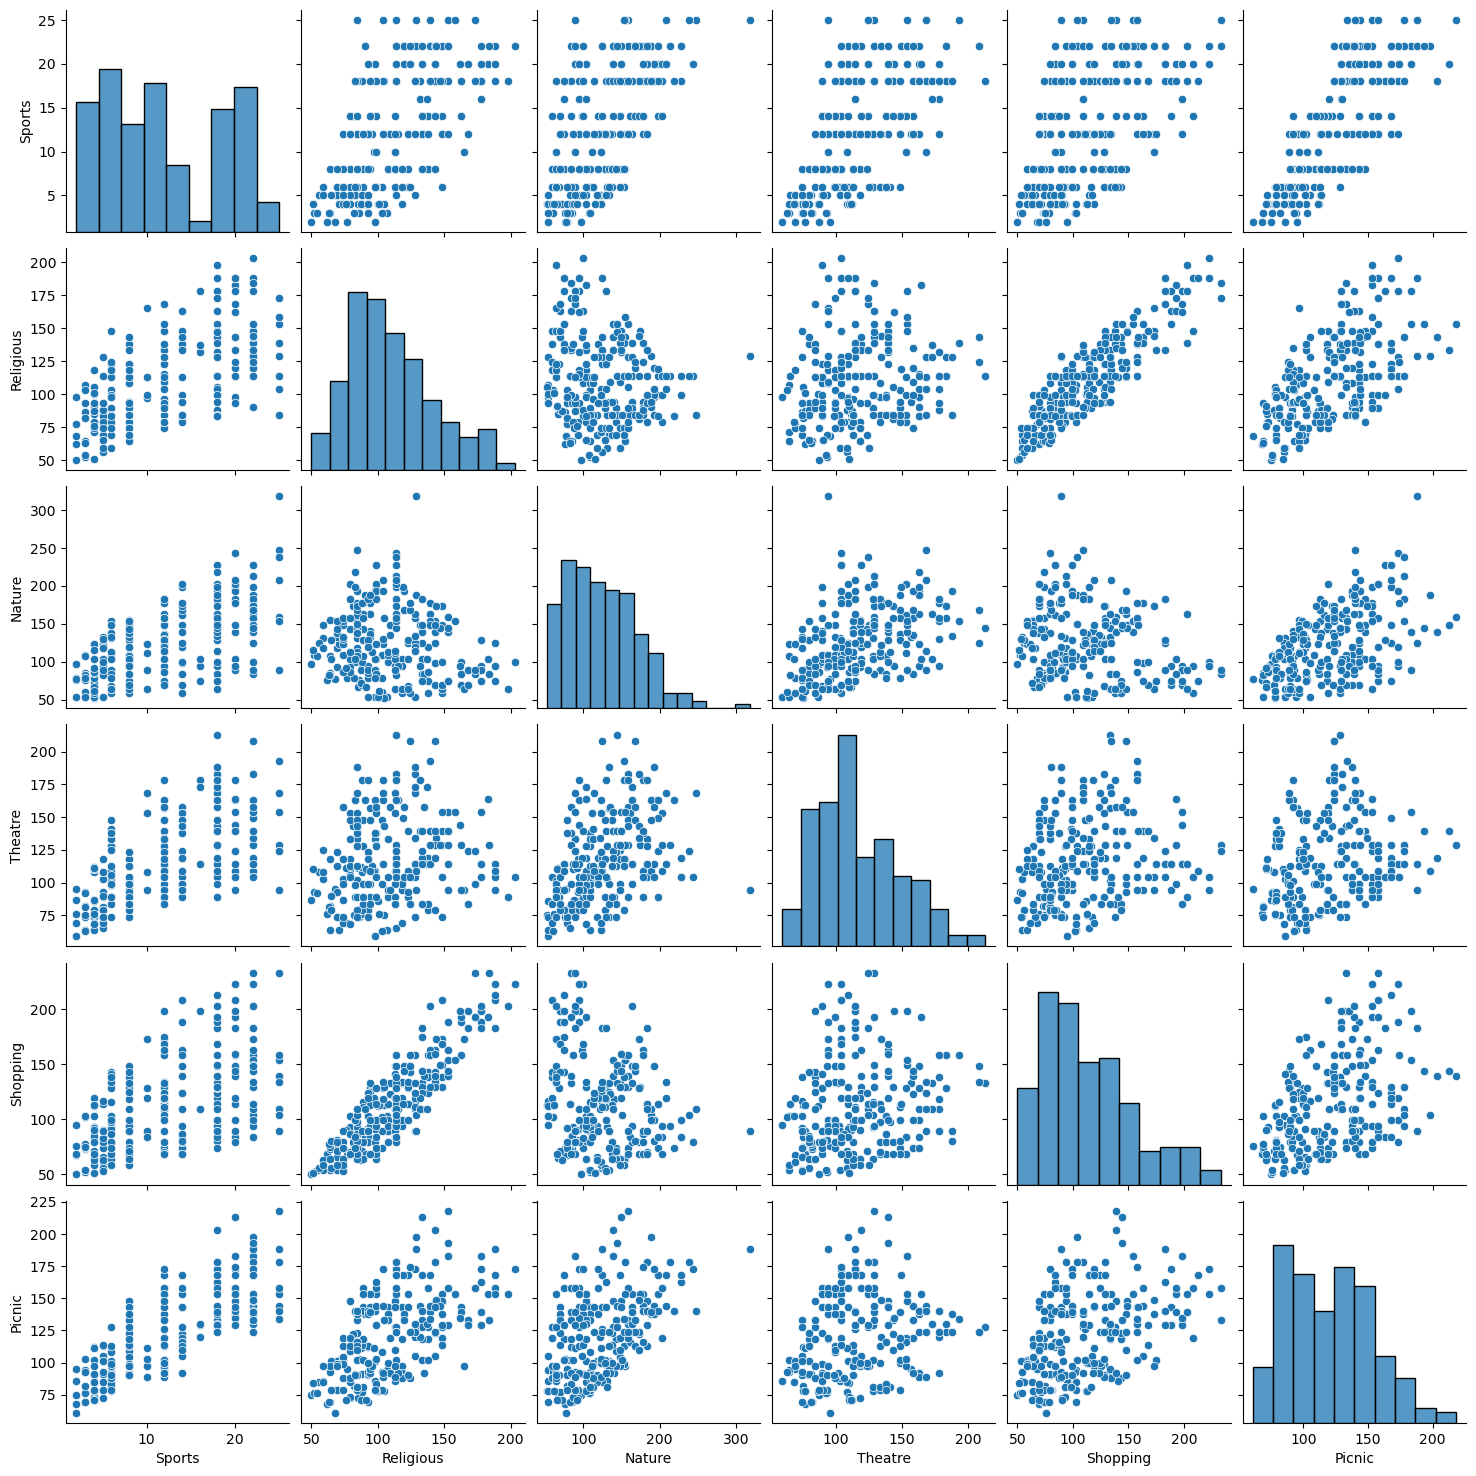

In [11]:
#Using Seaborn pairplot function, the numerical variables can be viewd in scatter plot and histograms
sns.pairplot(BDdata.iloc[:,[0,1,2,3,4,5]])

In [12]:
#with our focus only on 4 columns,use the iloc function to select them, carry out normalisation before we do clustering
from sklearn.preprocessing import StandardScaler
X = BDdata.iloc[:,[1,2,3,4]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [13]:
BDdata.corr()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
Sports,1.000000,0.623400,0.608372,0.611728,0.583956,0.797777
Religious,0.623400,1.000000,-0.148365,0.169960,0.895652,0.603240
Nature,0.608372,-0.148365,1.000000,0.426901,-0.186125,0.522005
Theatre,0.611728,0.169960,0.426901,1.000000,0.182606,0.225921
Shopping,0.583956,0.895652,-0.186125,0.182606,1.000000,0.442214
Picnic,0.797777,0.603240,0.522005,0.225921,0.442214,1.000000


Correlation Heat map of the data


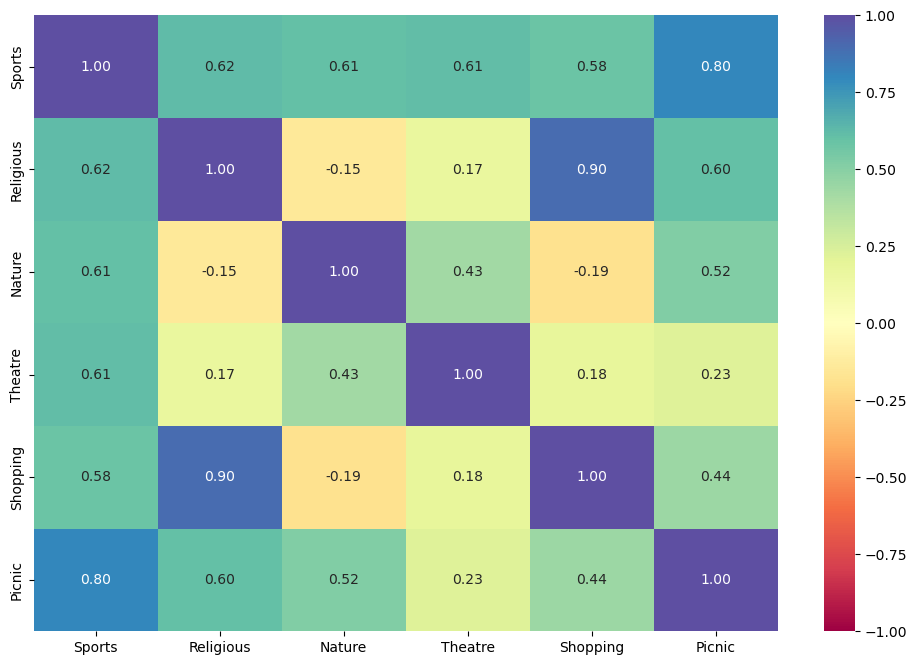

In [14]:
print('Correlation Heat map of the data')
plt.figure(figsize=(12,8))
sns.heatmap(BDdata.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

# K-MEANS CLUSTERING

C:\Users\STANMARX\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\STANMARX\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\STANMARX\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\STANMARX\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory le

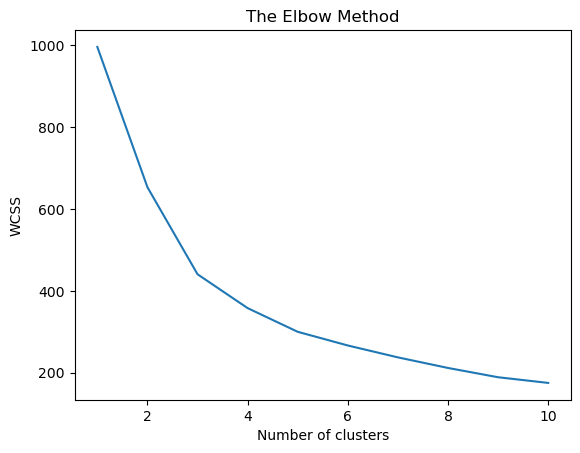

In [15]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#After knowing the nos of clusters, use the fit predict method to know lenght of dataframe
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters =3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\STANMARX\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
#We need to reduce dimensionality before we can visualise using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced= pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.49492909, 0.35672223])

In [18]:
sum(pca.explained_variance_ratio_)

0.8516513256543418

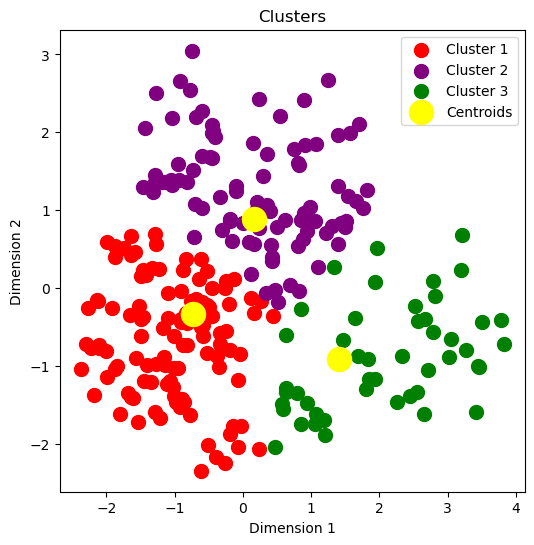

In [19]:
#Visualising the clusters

colours = ['red', 'purple', 'green']

plt.figure(figsize=(6,6))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],
                s = 100, c = colours[i], label = 'Cluster '+str(i+1))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c ='yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [20]:
#Evaluating the model performance
from sklearn import metrics
score = metrics.silhouette_score(X_reduced, kmeans.labels_, metric='euclidean')

# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.432


# AGGLOMERATIVE

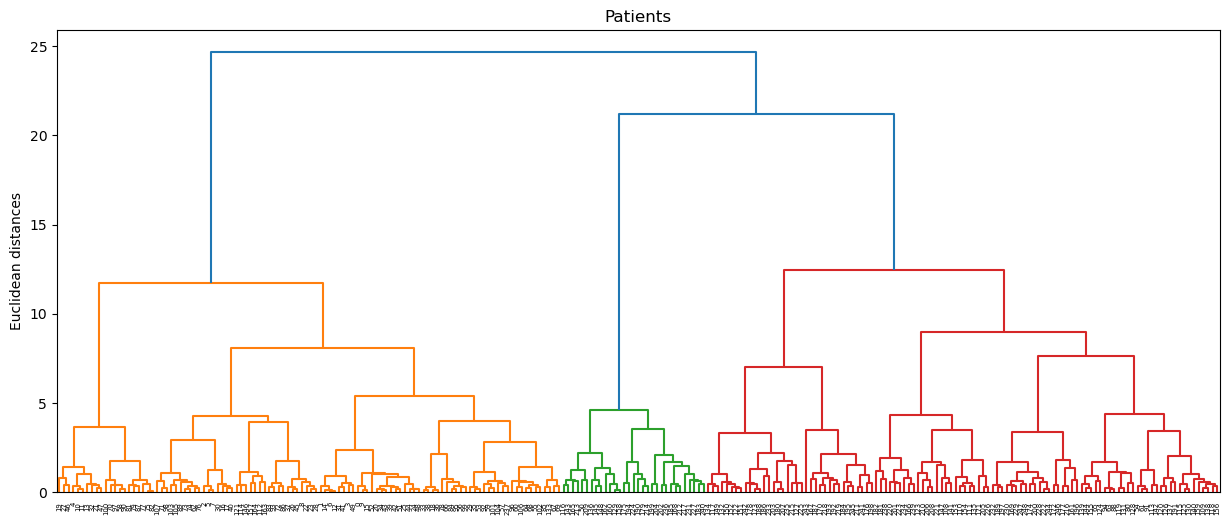

In [21]:
#First import the needed funtion...
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.title('Patients')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
#Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc2.fit_predict(X)

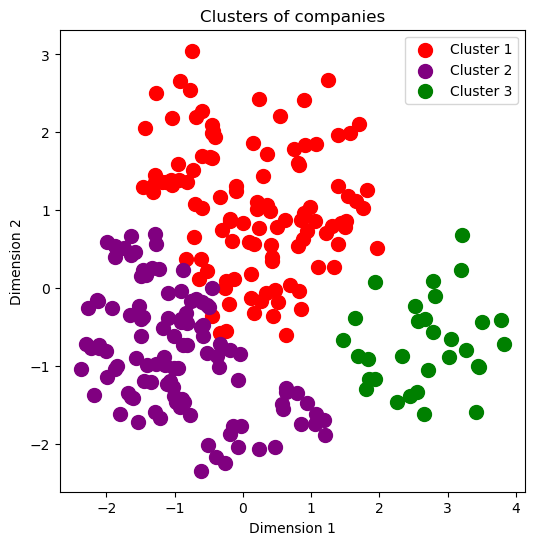

In [23]:
#Visualising the clusters

colours = ['red', 'purple', 'green']

plt.figure(figsize=(6,6))
for i in range(3):
    plt.scatter(X_reduced[y_hc2 == i, 0], X_reduced[y_hc2 == i, 1],
                s = 100, c = colours[i], label = 'Cluster '+str(i+1))
plt.title('Clusters of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [24]:
from sklearn import metrics
score = metrics.silhouette_score(X_reduced, hc2.labels_, metric='euclidean')

# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.396
